# # Fourier Donusumu
### Sekil 3.28

In [5]:
# coding: utf-8
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

### Once basit bir grafik hazirlayalim.
### Bir daire cizelim. 

In [6]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
A=np.ones([100,100])
X,Y=np.meshgrid(np.r_[0:100], np.r_[0:100]);
ind=np.sqrt((X-50.)**2+(Y-50.)**2)<20
A[ind]=0;

### Simdi de frekans bolgesindeki karsiligina bakalim

In [7]:
FA=np.fft.fftshift(np.fft.fft2(A));
freq = np.fft.fftshift(np.fft.fftfreq(A.shape[-1], d=1));

# Frekans bolgesi gosteriminde X=50, Y=50 noktasi (orta nokta) en temel frekansi gostermekte, ve frekans degerleri bu noktadan uzaklastikca artmaktadir. Bu nedenle aslinda hazirladigimiz daire goruntusunu bir yuksek geciren filtre olarak kullanabiliriz. Matematiksel tersi de alcak geciren filtredir. 

# Filtreleri frekans bolgesinde carpma islemi ile uygulayabiliriz.


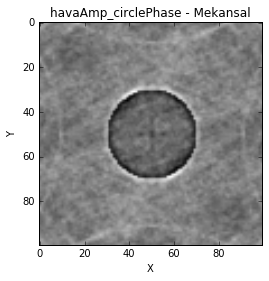

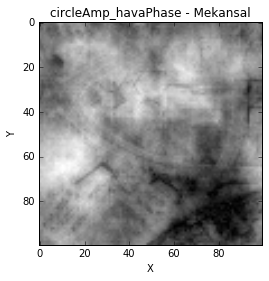

In [8]:
aircam=scipy.misc.imread('../ext/airborne_image.tif', flatten=True)
aircam=scipy.misc.imresize(aircam, A.shape)

Faircam=np.fft.fftshift(np.fft.fft2(aircam));

#Simdi Hava ve Daire'nin faz ve genliklerini karistiralim.
aircamAmp_circlePhase=np.fft.ifft2(np.fft.ifftshift(abs(Faircam)*np.exp(1j*np.angle(FA))))
circleAmp_aircamPhase=np.fft.ifft2(np.fft.ifftshift(abs(FA)*np.exp(1j*np.angle(Faircam))))

setup_graph(x_label='X', y_label='Y', title='havaAmp_circlePhase - Mekansal')
plt.imshow((np.abs(aircamAmp_circlePhase)));plt.gray();

setup_graph(x_label='X', y_label='Y', title='circleAmp_havaPhase - Mekansal')
plt.imshow((np.abs(circleAmp_aircamPhase)));plt.gray();